In [1]:
import re
import math 
import numpy as np
import pandas as pd
from datetime import datetime, date
import matplotlib.pyplot as plt
import seaborn as sns 
import xarray as xr
import csv 

In [2]:
# Import NC File 
ds_rainfall = xr.open_dataset(r'C:\Users\Admin\Downloads\rainfall_hadukgrid_uk_region_day_18910101-20191231.nc')

In [3]:
df = ds_rainfall.to_dataframe()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1507712 entries, (0, 1, Timestamp('1891-01-01 12:00:00')) to (1, 16, Timestamp('2019-12-31 12:00:00'))
Data columns (total 3 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   rainfall    1507712 non-null  float64       
 1   time_bnds   1507712 non-null  datetime64[ns]
 2   geo_region  1507712 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 44.7+ MB


In [5]:
df.head()

rainfall           time_bnds  \
bnds region time                                                
0    1      1891-01-01 12:00:00  0.038207 1891-01-01 09:00:00   
            1891-01-02 12:00:00  0.007511 1891-01-02 09:00:00   
            1891-01-03 12:00:00  1.232766 1891-01-03 09:00:00   
            1891-01-04 12:00:00  0.391685 1891-01-04 09:00:00   
            1891-01-05 12:00:00  0.119878 1891-01-05 09:00:00   

                                                    geo_region  
bnds region time                                                
0    1      1891-01-01 12:00:00  b'East Midlands             '  
            1891-01-02 12:00:00  b'East Midlands             '  
            1891-01-03 12:00:00  b'East Midlands             '  
            1891-01-04 12:00:00  b'East Midlands             '  
            1891-01-05 12:00:00  b'East Midlands             '

In [6]:
df.geo_region.value_counts(normalize=True)

b'South West England        '    0.0625
b'Northern Ireland          '    0.0625
b'Isle of Man               '    0.0625
b'East Scotland             '    0.0625
b'North West England        '    0.0625
b'Channel Islands           '    0.0625
b'Wales                     '    0.0625
b'South East England        '    0.0625
b'East of England           '    0.0625
b'East Midlands             '    0.0625
b'Yorkshire and Humber      '    0.0625
b'London                    '    0.0625
b'West Midlands             '    0.0625
b'North East England        '    0.0625
b'West Scotland             '    0.0625
b'North Scotland            '    0.0625
Name: geo_region, dtype: float64

In [7]:
df.head()

rainfall           time_bnds  \
bnds region time                                                
0    1      1891-01-01 12:00:00  0.038207 1891-01-01 09:00:00   
            1891-01-02 12:00:00  0.007511 1891-01-02 09:00:00   
            1891-01-03 12:00:00  1.232766 1891-01-03 09:00:00   
            1891-01-04 12:00:00  0.391685 1891-01-04 09:00:00   
            1891-01-05 12:00:00  0.119878 1891-01-05 09:00:00   

                                                    geo_region  
bnds region time                                                
0    1      1891-01-01 12:00:00  b'East Midlands             '  
            1891-01-02 12:00:00  b'East Midlands             '  
            1891-01-03 12:00:00  b'East Midlands             '  
            1891-01-04 12:00:00  b'East Midlands             '  
            1891-01-05 12:00:00  b'East Midlands             '

In [8]:
df.index

MultiIndex([(0,  1, '1891-01-01 12:00:00'),
            (0,  1, '1891-01-02 12:00:00'),
            (0,  1, '1891-01-03 12:00:00'),
            (0,  1, '1891-01-04 12:00:00'),
            (0,  1, '1891-01-05 12:00:00'),
            (0,  1, '1891-01-06 12:00:00'),
            (0,  1, '1891-01-07 12:00:00'),
            (0,  1, '1891-01-08 12:00:00'),
            (0,  1, '1891-01-09 12:00:00'),
            (0,  1, '1891-01-10 12:00:00'),
            ...
            (1, 16, '2019-12-22 12:00:00'),
            (1, 16, '2019-12-23 12:00:00'),
            (1, 16, '2019-12-24 12:00:00'),
            (1, 16, '2019-12-25 12:00:00'),
            (1, 16, '2019-12-26 12:00:00'),
            (1, 16, '2019-12-27 12:00:00'),
            (1, 16, '2019-12-28 12:00:00'),
            (1, 16, '2019-12-29 12:00:00'),
            (1, 16, '2019-12-30 12:00:00'),
            (1, 16, '2019-12-31 12:00:00')],
           names=['bnds', 'region', 'time'], length=1507712)

In [9]:
df_to_clean = df.copy()

In [10]:
df.groupby('region').max() #to see what regions numbers equate to region names

,rainfall,time_bnds,geo_region
region,,,
1,5.662655e+01,2020-01-01 09:00:00,b'East Midlands '
2,6.017456e+01,2020-01-01 09:00:00,b'East of England '
3,5.934569e+01,2020-01-01 09:00:00,b'East Scotland '
4,5.233701e+01,2020-01-01 09:00:00,b'London '
5,6.341171e+01,2020-01-01 09:00:00,b'North East England '
6,5.744903e+01,2020-01-01 09:00:00,b'North Scotland '
7,5.090666e+01,2020-01-01 09:00:00,b'North West England '
8,4.200139e+01,2020-01-01 09:00:00,b'South East England '
9,7.169019e+01,2020-01-01 09:00:00,b'South West England '


In [11]:
list(df.groupby('region').max().geo_region) 

[b'East Midlands             ',
 b'East of England           ',
 b'East Scotland             ',
 b'London                    ',
 b'North East England        ',
 b'North Scotland            ',
 b'North West England        ',
 b'South East England        ',
 b'South West England        ',
 b'West Midlands             ',
 b'West Scotland             ',
 b'Yorkshire and Humber      ',
 b'Channel Islands           ',
 b'Isle of Man               ',
 b'Northern Ireland          ',
 b'Wales                     ']

In [12]:
#Cleaning the column names 
clean_col_names = []
for name in list(df.groupby('region').max().geo_region):
    name_to_search = str(name)
    pattern = re.compile(r"([A-Z]\w+((\s[A-Z]\w+){1,3}|\sof\s[A-Z]\w+|\sand\s[A-Z]\w+|\s))")
    match_object = re.search(pattern,name_to_search[1:]) #Returns match object Indexed string to ignore the "b'"
    clean_col_names.append(match_object.group(0))


In [13]:
clean_col_names

['East Midlands',
 'East of England',
 'East Scotland',
 'London ',
 'North East England',
 'North Scotland',
 'North West England',
 'South East England',
 'South West England',
 'West Midlands',
 'West Scotland',
 'Yorkshire and Humber',
 'Channel Islands',
 'Isle of Man',
 'Northern Ireland',
 'Wales ']

In [14]:
regions = list(df.groupby('region').max().index)
region_names = list(df.groupby('region').max().geo_region)
rename_dict = {region: str(name) for region,name in zip(regions,region_names)}

In [15]:
rename_dict[1]

"b'East Midlands             '"

In [16]:
df_to_clean.unstack(level=1).head()

rainfall                                          \
region                          1         2         3         4         5    
bnds time                                                                    
0    1891-01-01 12:00:00  0.038207  0.062382  0.673353  0.015701  0.002181   
     1891-01-02 12:00:00  0.007511  0.000349  0.748390  0.000024  1.680578   
     1891-01-03 12:00:00  1.232766  1.738081  2.423451  1.926087  1.614585   
     1891-01-04 12:00:00  0.391685  0.201403  1.499640  0.048860  3.620134   
     1891-01-05 12:00:00  0.119878  1.337887  0.457400  0.031704  1.623150   

                                                                            \
region                          6         7         8         9         10   
bnds time                                                                    
0    1891-01-01 12:00:00  0.992063  0.037144  0.340072  0.085441  0.009921   
     1891-01-02 12:00:00  0.689566  0.812118  0.058602  0.727717  0.068994   
     1891-01-03 12:00:00  2.943856  1.869059  2.326119  1.971196  1.495874   
     1891-01-04 12:00:00  3.370363  0.359671  0.374058  0.144248  0.174370   
     1891-01-05 12:00:00  0.835971  0.074624  0.457338  0.026676  0.129387   

                          ...                     geo_region  \
region                    ...                             7    
bnds time                 ...                                  
0    1891-01-01 12:00:00  ...  b'North West England        '   
     1891-01-02 12:00:00  ...  b'North West England        '   
     1891-01-03 12:00:00  ...  b'North West England        '   
     1891-01-04 12:00:00  ...  b'North West England        '   
     1891-01-05 12:00:00  ...  b'North West England        '   

                                                         \
region                                               8    
bnds time                                                 
0    1891-01-01 12:00:00  b'South East England        '   
     1891-01-02 12:00:00  b'South East England        '   
     1891-01-03 12:00:00  b'South East England        '   
     1891-01-04 12:00:00  b'South East England        '   
     1891-01-05 12:00:00  b'South East England        '   

                                                         \
region                                               9    
bnds time                                                 
0    1891-01-01 12:00:00  b'South West England        '   
     1891-01-02 12:00:00  b'South West England        '   
     1891-01-03 12:00:00  b'South West England        '   
     1891-01-04 12:00:00  b'South West England        '   
     1891-01-05 12:00:00  b'South West England        '   

                                                         \
region                                               10   
bnds time                                                 
0    1891-01-01 12:00:00  b'West Midlands             '   
     1891-01-02 12:00:00  b'West Midlands             '   
     1891-01-03 12:00:00  b'West Midlands             '   
     1891-01-04 12:00:00  b'West Midlands             '   
     1891-01-05 12:00:00  b'West Midlands             '   

                                                         \
region                                               11   
bnds time                                                 
0    1891-01-01 12:00:00  b'West Scotland             '   
     1891-01-02 12:00:00  b'West Scotland             '   
     1891-01-03 12:00:00  b'West Scotland             '   
     1891-01-04 12:00:00  b'West Scotland             '   
     1891-01-05 12:00:00  b'West Scotland             '   

                                                         \
region                                               12   
bnds time                                                 
0    1891-01-01 12:00:00  b'Yorkshire and Humber      '   
     1891-01-02 12:00:00  b'Yorkshire and Humber      '   
     1891-01-03 12:00:00  b'Yorkshire and Humber      '   
     1891-01-04 1

In [17]:
#Drop Unwanted columns and indecies 
df_to_clean2 = df_to_clean.unstack(level=1).droplevel(0).drop(columns=['time_bnds','geo_region']).droplevel(0,axis=1)

In [18]:
df_to_clean2.unstack()

region  time               
1       1891-01-01 12:00:00    0.038207
        1891-01-02 12:00:00    0.007511
        1891-01-03 12:00:00    1.232766
        1891-01-04 12:00:00    0.391685
        1891-01-05 12:00:00    0.119878
                                 ...   
16      2019-12-27 12:00:00    0.708639
        2019-12-28 12:00:00    0.061756
        2019-12-29 12:00:00    0.040950
        2019-12-30 12:00:00    0.122753
        2019-12-31 12:00:00    0.042822
Length: 1507712, dtype: float64

In [19]:
df_to_clean2.shape

(94232, 16)

In [20]:
#Renaming the columns 
df_to_clean2.columns = clean_col_names 

In [21]:
df_to_clean2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 94232 entries, 1891-01-01 12:00:00 to 2019-12-31 12:00:00
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   East Midlands         94232 non-null  float64
 1   East of England       94232 non-null  float64
 2   East Scotland         94232 non-null  float64
 3   London                94232 non-null  float64
 4   North East England    94232 non-null  float64
 5   North Scotland        94232 non-null  float64
 6   North West England    94232 non-null  float64
 7   South East England    94232 non-null  float64
 8   South West England    94232 non-null  float64
 9   West Midlands         94232 non-null  float64
 10  West Scotland         94232 non-null  float64
 11  Yorkshire and Humber  94232 non-null  float64
 12  Channel Islands       94232 non-null  float64
 13  Isle of Man           94232 non-null  float64
 14  Northern Ireland      94232 non-nul

In [22]:
df_to_clean2.head()

,East Midlands,East of England,East Scotland,London,North East England,North Scotland,North West England,South East England,South West England,West Midlands,West Scotland,Yorkshire and Humber,Channel Islands,Isle of Man,Northern Ireland,Wales
time,,,,,,,,,,,,,,,,
1891-01-01 12:00:00,0.038207,0.062382,0.673353,0.015701,0.002181,0.992063,0.037144,0.340072,0.085441,0.009921,2.071759,0.002048,9.969210e+36,0.007126,1.547232,0.018642
1891-01-02 12:00:00,0.007511,0.000349,0.748390,0.000024,1.680578,0.689566,0.812118,0.058602,0.727717,0.068994,0.601028,0.491786,9.969210e+36,0.371345,0.635591,0.334446
1891-01-03 12:00:00,1.232766,1.738081,2.423451,1.926087,1.614585,2.943856,1.869059,2.326119,1.971196,1.495874,6.092219,2.017263,9.969210e+36,0.056683,2.626677,4.142716
1891-01-04 12:00:00,0.391685,0.201403,1.499640,0.048860,3.620134,3.370363,0.359671,0.374058,0.144248,0.174370,0.115535,1.922366,9.969210e+36,0.002830,0.000925,0.446111
1891-01-05 12:00:00,0.119878,1.337887,0.457400,0.031704,1.623150,0.835971,0.074624,0.457338,0.026676,0.129387,0.026487,1.080433,9.969210e+36,0.000232,0.000000,0.015325


In [23]:
df_final = df_to_clean2.loc['2011-05-27':]

In [24]:
df_final = df_final.resample('D').mean()

In [25]:
df_final.head()

,East Midlands,East of England,East Scotland,London,North East England,North Scotland,North West England,South East England,South West England,West Midlands,West Scotland,Yorkshire and Humber,Channel Islands,Isle of Man,Northern Ireland,Wales
time,,,,,,,,,,,,,,,,
2011-05-27,0.338427,0.568244,2.518522,0.072591,1.392693,8.456431,6.144072,0.052724,0.117977,0.169313,6.840196,1.580684,9.969210e+36,1.218085,1.982118,3.914070
2011-05-28,0.168932,0.050861,1.936929,0.015771,2.072547,7.949044,3.987347,0.028282,0.923930,0.345130,7.828783,1.724447,9.969210e+36,0.938112,2.611878,2.481342
2011-05-29,3.626871,0.008499,1.144060,0.002411,0.568497,7.769322,2.521825,0.047888,2.951616,7.879865,2.131571,3.708652,9.969210e+36,0.168776,0.160491,7.313690
2011-05-30,7.266138,5.242294,1.743907,1.622173,0.777751,2.651348,2.151121,2.372488,2.533854,4.613446,0.941094,3.015598,9.969210e+36,0.414628,2.574429,1.864475
2011-05-31,0.059108,0.751049,1.178030,0.218828,0.077770,14.165608,0.113211,0.126262,0.056183,0.059839,2.064092,0.024849,9.969210e+36,0.022508,0.237662,0.081742


In [26]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3141 entries, 2011-05-27 to 2019-12-31
Freq: D
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   East Midlands         3141 non-null   float64
 1   East of England       3141 non-null   float64
 2   East Scotland         3141 non-null   float64
 3   London                3141 non-null   float64
 4   North East England    3141 non-null   float64
 5   North Scotland        3141 non-null   float64
 6   North West England    3141 non-null   float64
 7   South East England    3141 non-null   float64
 8   South West England    3141 non-null   float64
 9   West Midlands         3141 non-null   float64
 10  West Scotland         3141 non-null   float64
 11  Yorkshire and Humber  3141 non-null   float64
 12  Channel Islands       3141 non-null   float64
 13  Isle of Man           3141 non-null   float64
 14  Northern Ireland      3141 non-null   float64


In [27]:
df_final['Month'] = df_final.index.map(lambda x: x.month)
df_final['Day_of_week'] = df_final.index.map(lambda x: x.strftime('%A'))

In [28]:
df_final.columns = [col.replace(' ','') if col == 'London ' or col == 'Wales ' in col else col.replace(' ','_') for col in df_final.columns ]

In [29]:
df_final.columns

Index(['East_Midlands', 'East_of_England', 'East_Scotland', 'London',
       'North_East_England', 'North_Scotland', 'North_West_England',
       'South_East_England', 'South_West_England', 'West_Midlands',
       'West_Scotland', 'Yorkshire_and_Humber', 'Channel_Islands',
       'Isle_of_Man', 'Northern_Ireland', 'Wales', 'Month', 'Day_of_week'],
      dtype='object')

In [30]:
#DROP COLUMN WITH STRANGE VALUES
df_final.drop(columns=['Channel_Islands'],inplace=True)

<AxesSubplot:>

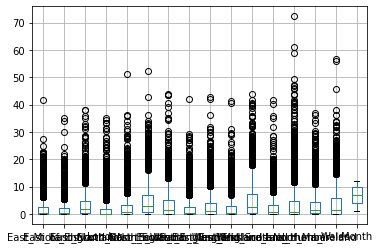

In [36]:
df_final.boxplot()

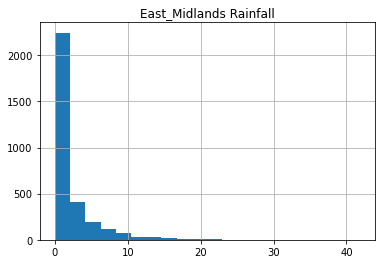

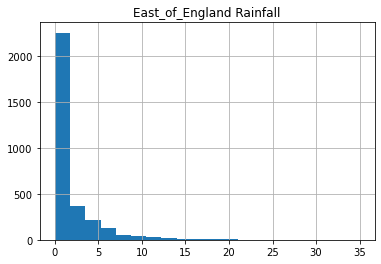

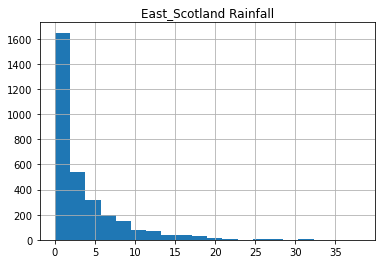

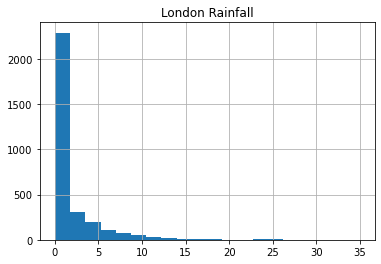

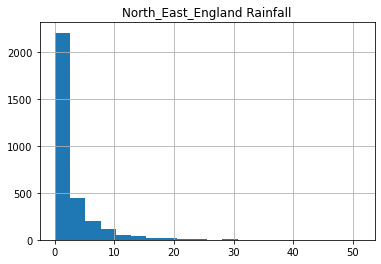

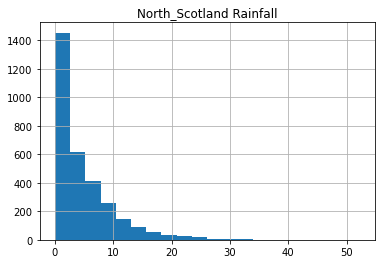

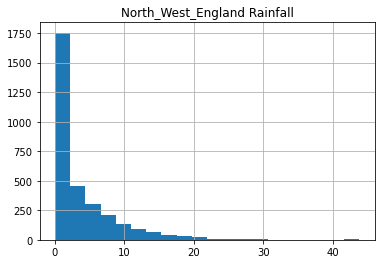

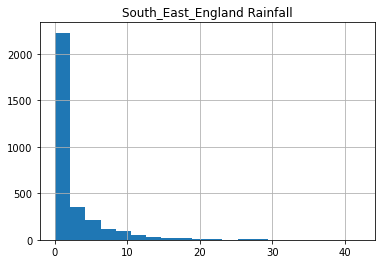

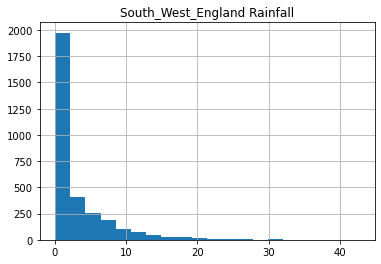

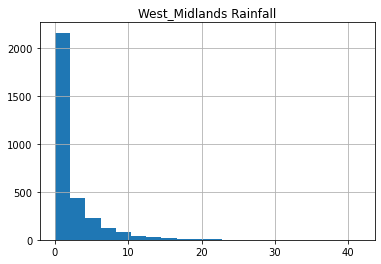

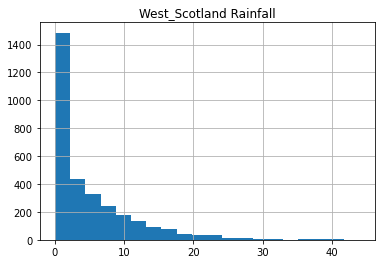

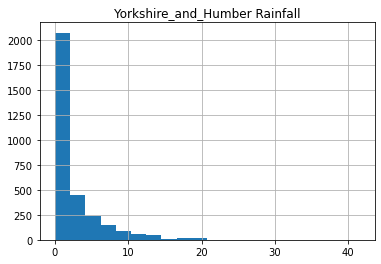

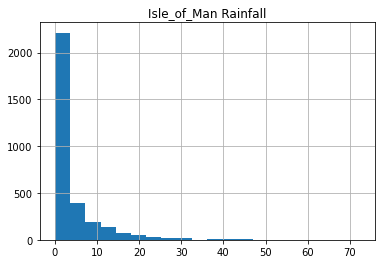

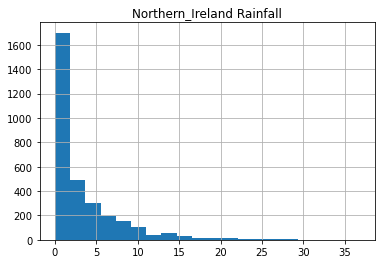

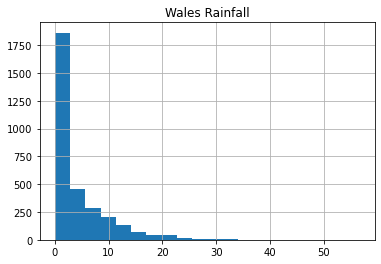

In [68]:
for col in df_final.columns[:-2]:
    df_final[col].hist(bins=20)
    plt.title(col+' Rainfall')
    plt.show()